### A CLASSIFICATION PROJECT - CUSTOMER CHURN ANALYSIS

#### PROJECT SCENARIO
As a data scientist at Vodafone Corporation, a large telecommunication company.
* Vodafone want to find the likelihood of a customer leaving the organization, the key indicators of churn as well as the retention strategies that can be implemented to avert this problem.
* To do this, the business development unit has provided you with data to build a series of machine learning models to predict customer churn.
* The marketing and sales team as well have provided you with some data to aid this endeavor.


#### PROJECT DESCRIPTION
 Telecommunication companies face the ongoing challenge of customer churn, where subscribers discontinue services and switch to competitors. 
 To address this issue and proactively retain customers, we are undertaking a customer churn analysis project utilizing machine learning techniques. 
 In this project, we explore how machine learning techniques can be leveraged for customer churn analysis in telecommunication networks, following the well-established CRISP-DM (Cross-Industry Standard Process for Data Mining) framework. 


#### BUSINESS UNDERSTANDING
In today's highly competitive telecommunication industry, customer churn, or the loss of customers to competitors, poses a significant challenge for companies striving to maintain market share and profitability. 
Identifying customers at risk of churn and implementing proactive retention strategies is crucial for sustaining business growth.

##### HYPOTHESIS
NULL HYPOTHESIS: There is no relationship between the tenure and the churn of customers.

ALTERNATE HYPOTHESIS: There is a relationship between the tenure and the churn of customers.

##### ANALYTICAL QUESTIONS
1. What is the overall churn rate of the telecommunication company?
2. Does churn rate differ based on the payment method?
3. What is the churn rate of customers based on their seniority?
4. What is the churn rate of customers based on their monthlycharges?
5. What is the churn rate of customers based on their contract type?
6. What is the churn rate of customers based on their gender?

#### DATA UNDERSTANDING

##### Loading the necessary libraries

In [2]:
import numpy as np
import pandas as pd
import os
import pyodbc
from dotenv import load_dotenv
from dotenv import dotenv_values
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy import stats
#Machine Learning Packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbPipeline
from sklearn.feature_selection import SelectKBest, mutual_info_classif
import warnings
warnings.filterwarnings('ignore')

##### Load the datasets

In [3]:
#Loading first dataset from database
# Load environment variables from .env file
environment_variables = dotenv_values('.env')

# Access database credentials from environment variables dictionary
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
password = environment_variables.get("PASSWORD")
username = environment_variables.get("USERNAME")

# Construct the connection string
connection_string = f"DRIVER=ODBC Driver 17 for SQL Server;SERVER={server};DATABASE={database};User Id={username};PASSWORD={password};"

print("USERNAME:", username)

# Construct the connection string
connection_string = f"DRIVER=ODBC Driver 17 for SQL Server;SERVER={server};DATABASE={database};UID={username};PWD={password};"
# Connect to the database
try:
    connection = pyodbc.connect(connection_string)
    print("Connection successful!")
except Exception as e:
    print("Error:", e)

# Specify the SQL queries to extract data from the tables
Dataset1 = "SELECT * FROM dbo.LP2_Telco_churn_first_3000"

# Suppress warnings
warnings.filterwarnings('ignore')

# Create a cursor from the connection
with connection.cursor() as cursor:
    # Execute the queries and fetch data into Pandas DataFrames
    Dataset1 = pd.read_sql_query(Dataset1, connection)

USERNAME: LP2_project
Connection successful!


In [4]:
#Preview the first dataset
Dataset1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [5]:
#Load the second the dataset
Dataset2 = pd.read_csv("./Dataset/LP2_Telco-churn-second-2000.csv")
Dataset2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [6]:
#Check the columns
column_names = Dataset1.columns
print(column_names)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [7]:
#Check the columns
column_names = Dataset2.columns
print(column_names)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [8]:
#Check the number of rows and columns
Dataset1.shape

(3000, 21)

In [9]:
#Check the number of rows and columns
Dataset2.shape

(2043, 21)

##### Observations
1. The outputs show both datasets have the same column names and number of columns so they can be merged easily.
2. However, some of the column names are in upper case so they will be converted to lower case.

In [10]:
#Convert column names to lower case
Dataset1.columns = Dataset1.columns.str.lower()

#Check the columns to confirm
column_names = Dataset1.columns
print(column_names)

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')


In [11]:
#Convert column names to lower case
Dataset2.columns = Dataset2.columns.str.lower()

#Check the columns to confirm
column_names = Dataset2.columns
print(column_names)

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')


In [12]:
#Check cell values
Dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   seniorcitizen     3000 non-null   bool   
 3   partner           3000 non-null   bool   
 4   dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   phoneservice      3000 non-null   bool   
 7   multiplelines     2731 non-null   object 
 8   internetservice   3000 non-null   object 
 9   onlinesecurity    2349 non-null   object 
 10  onlinebackup      2349 non-null   object 
 11  deviceprotection  2349 non-null   object 
 12  techsupport       2349 non-null   object 
 13  streamingtv       2349 non-null   object 
 14  streamingmovies   2349 non-null   object 
 15  contract          3000 non-null   object 
 16  paperlessbilling  3000 non-null   bool   


##### This shows there are empty cells in these columns; multiplelines, onlinesecurity, onlinebackup, deviceprotection, techsupport, streamingtv, streamingmovies, totalcharges and churn. They will be treated accordingly.

In [13]:
#Check cell values
Dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   seniorcitizen     2043 non-null   int64  
 3   partner           2043 non-null   object 
 4   dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   phoneservice      2043 non-null   object 
 7   multiplelines     2043 non-null   object 
 8   internetservice   2043 non-null   object 
 9   onlinesecurity    2043 non-null   object 
 10  onlinebackup      2043 non-null   object 
 11  deviceprotection  2043 non-null   object 
 12  techsupport       2043 non-null   object 
 13  streamingtv       2043 non-null   object 
 14  streamingmovies   2043 non-null   object 
 15  contract          2043 non-null   object 
 16  paperlessbilling  2043 non-null   object 


##### This shows there are no empty cells in any of the columns but some of the columns have the wrong datatype. This will be taken care of accordingly.

In [14]:
#Check for the unique values of each column
def check_unique_values(df):
    for column in df.columns:
        unique_values = df[column].unique()
        print(f"Unique values in column '{column}': {unique_values}")

#Check for Dataset1
check_unique_values(Dataset1)

Unique values in column 'customerid': ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '1891-FZYSA' '4770-UEZOX'
 '1A1:U3001038-RQOST']
Unique values in column 'gender': ['Female' 'Male']
Unique values in column 'seniorcitizen': [False  True]
Unique values in column 'partner': [ True False]
Unique values in column 'dependents': [False  True]
Unique values in column 'tenure': [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Unique values in column 'phoneservice': [False  True]
Unique values in column 'multiplelines': [None False True]
Unique values in column 'internetservice': ['DSL' 'Fiber optic' 'No']
Unique values in column 'onlinesecurity': [False True None]
Unique values in column 'onlinebackup': [True False None]
Unique values in column 'deviceprotection': [False True None]
Unique values in column 'techsupport': [

In [15]:
def check_unique_values(df):
    for column in df.columns:
        unique_values = df[column].unique()
        print(f"Unique values in column '{column}': {unique_values}")

#Check for Dataset2
check_unique_values(Dataset2)

Unique values in column 'customerid': ['5600-PDUJF' '8292-TYSPY' '0567-XRHCU' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Unique values in column 'gender': ['Male' 'Female']
Unique values in column 'seniorcitizen': [0 1]
Unique values in column 'partner': ['No' 'Yes']
Unique values in column 'dependents': ['No' 'Yes']
Unique values in column 'tenure': [ 6 19 69 11 64 39 15 25 66 61 43 12 23 71 34  5 41 72 14  1 10  7  9 48
 20 16  2 22 35 54 56 18 68 53 30 36 55 21 33 44  4 49 42 67 40 45 57  8
 65  3 17 28 52 47 50 46 29 27 13 24 62 26 60 51 70 59 38 37  0 58 31 32
 63]
Unique values in column 'phoneservice': ['Yes' 'No']
Unique values in column 'multiplelines': ['No' 'No phone service' 'Yes']
Unique values in column 'internetservice': ['DSL' 'Fiber optic' 'No']
Unique values in column 'onlinesecurity': ['No' 'Yes' 'No internet service']
Unique values in column 'onlinebackup': ['No' 'Yes' 'No internet service']
Unique values in column 'deviceprotection': ['No' 'Yes' 'No internet serv

##### The 'True' and 'False' values in the first dataset will be replaced with 'Yes' and 'No' to ensure both datasets have the same values before they are merged.

In [16]:
#Replace the "True" and "False" values in Dataset1
def replace_true_false(df):
    df.replace({True: 'Yes', False: 'No'}, inplace=True)

replace_true_false(Dataset1)

In [17]:
#Check Dataset1 to confirm
Dataset1.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,No,Yes,No,1,No,None,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,7795-CFOCW,Male,No,No,No,45,No,None,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes


In [18]:
#Replace the values in seniorcitizen column
def replace_yes_no_with_1_0(df):
    df['seniorcitizen'] = df['seniorcitizen'].replace({'Yes': 1, 'No': 0})

replace_yes_no_with_1_0(Dataset1)

In [19]:
#Check Dataset1 to confirm
Dataset1.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,None,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,7795-CFOCW,Male,0,No,No,45,No,None,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes


##### Since the columns and values for both datasets are similar now, we will merge both datasets.

In [20]:
#Merge both datasets
df = pd.concat([Dataset1, Dataset2], axis=0)

In [21]:
#Check merged dataframe
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,None,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,7795-CFOCW,Male,0,No,No,45,No,None,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes


In [22]:
#Check rows and columns
df.shape

(5043, 21)

In [23]:
#Check cell values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   seniorcitizen     5043 non-null   int64  
 3   partner           5043 non-null   object 
 4   dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   phoneservice      5043 non-null   object 
 7   multiplelines     4774 non-null   object 
 8   internetservice   5043 non-null   object 
 9   onlinesecurity    4392 non-null   object 
 10  onlinebackup      4392 non-null   object 
 11  deviceprotection  4392 non-null   object 
 12  techsupport       4392 non-null   object 
 13  streamingtv       4392 non-null   object 
 14  streamingmovies   4392 non-null   object 
 15  contract          5043 non-null   object 
 16  paperlessbilling  5043 non-null   object 
 17  

##### The 'totalcharges' column has the wrong datatype. It will be converted into a float. 

In [24]:
#Convert 'totalcharges' column to numeric (float)
df['totalcharges'] = pd.to_numeric(df['totalcharges'], errors='coerce')

In [25]:
#Check cell values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   seniorcitizen     5043 non-null   int64  
 3   partner           5043 non-null   object 
 4   dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   phoneservice      5043 non-null   object 
 7   multiplelines     4774 non-null   object 
 8   internetservice   5043 non-null   object 
 9   onlinesecurity    4392 non-null   object 
 10  onlinebackup      4392 non-null   object 
 11  deviceprotection  4392 non-null   object 
 12  techsupport       4392 non-null   object 
 13  streamingtv       4392 non-null   object 
 14  streamingmovies   4392 non-null   object 
 15  contract          5043 non-null   object 
 16  paperlessbilling  5043 non-null   object 
 17  

In [26]:
#Check for duplicates
df.duplicated().sum()

0

In [27]:
#Check missing values
df.isna().sum()

customerid            0
gender                0
seniorcitizen         0
partner               0
dependents            0
tenure                0
phoneservice          0
multiplelines       269
internetservice       0
onlinesecurity      651
onlinebackup        651
deviceprotection    651
techsupport         651
streamingtv         651
streamingmovies     651
contract              0
paperlessbilling      0
paymentmethod         0
monthlycharges        0
totalcharges          8
churn                 1
dtype: int64

##### Check the columns

In [28]:
def check_unique_values(df):
    for column in df.columns:
        unique_values = df[column].unique()
        print(f"Unique values in column '{column}': {unique_values}")

#Check for Dataset2
check_unique_values(df)

Unique values in column 'customerid': ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Unique values in column 'gender': ['Female' 'Male']
Unique values in column 'seniorcitizen': [0 1]
Unique values in column 'partner': ['Yes' 'No']
Unique values in column 'dependents': ['No' 'Yes']
Unique values in column 'tenure': [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Unique values in column 'phoneservice': ['No' 'Yes']
Unique values in column 'multiplelines': [None 'No' 'Yes' 'No phone service']
Unique values in column 'internetservice': ['DSL' 'Fiber optic' 'No']
Unique values in column 'onlinesecurity': ['No' 'Yes' None 'No internet service']
Unique values in column 'onlinebackup': ['Yes' 'No' None 'No internet service']
Unique values in column 'deviceprotection': ['No' 'Yes' No

##### Univariate Analysis

##### Distribution of Categorical Variables

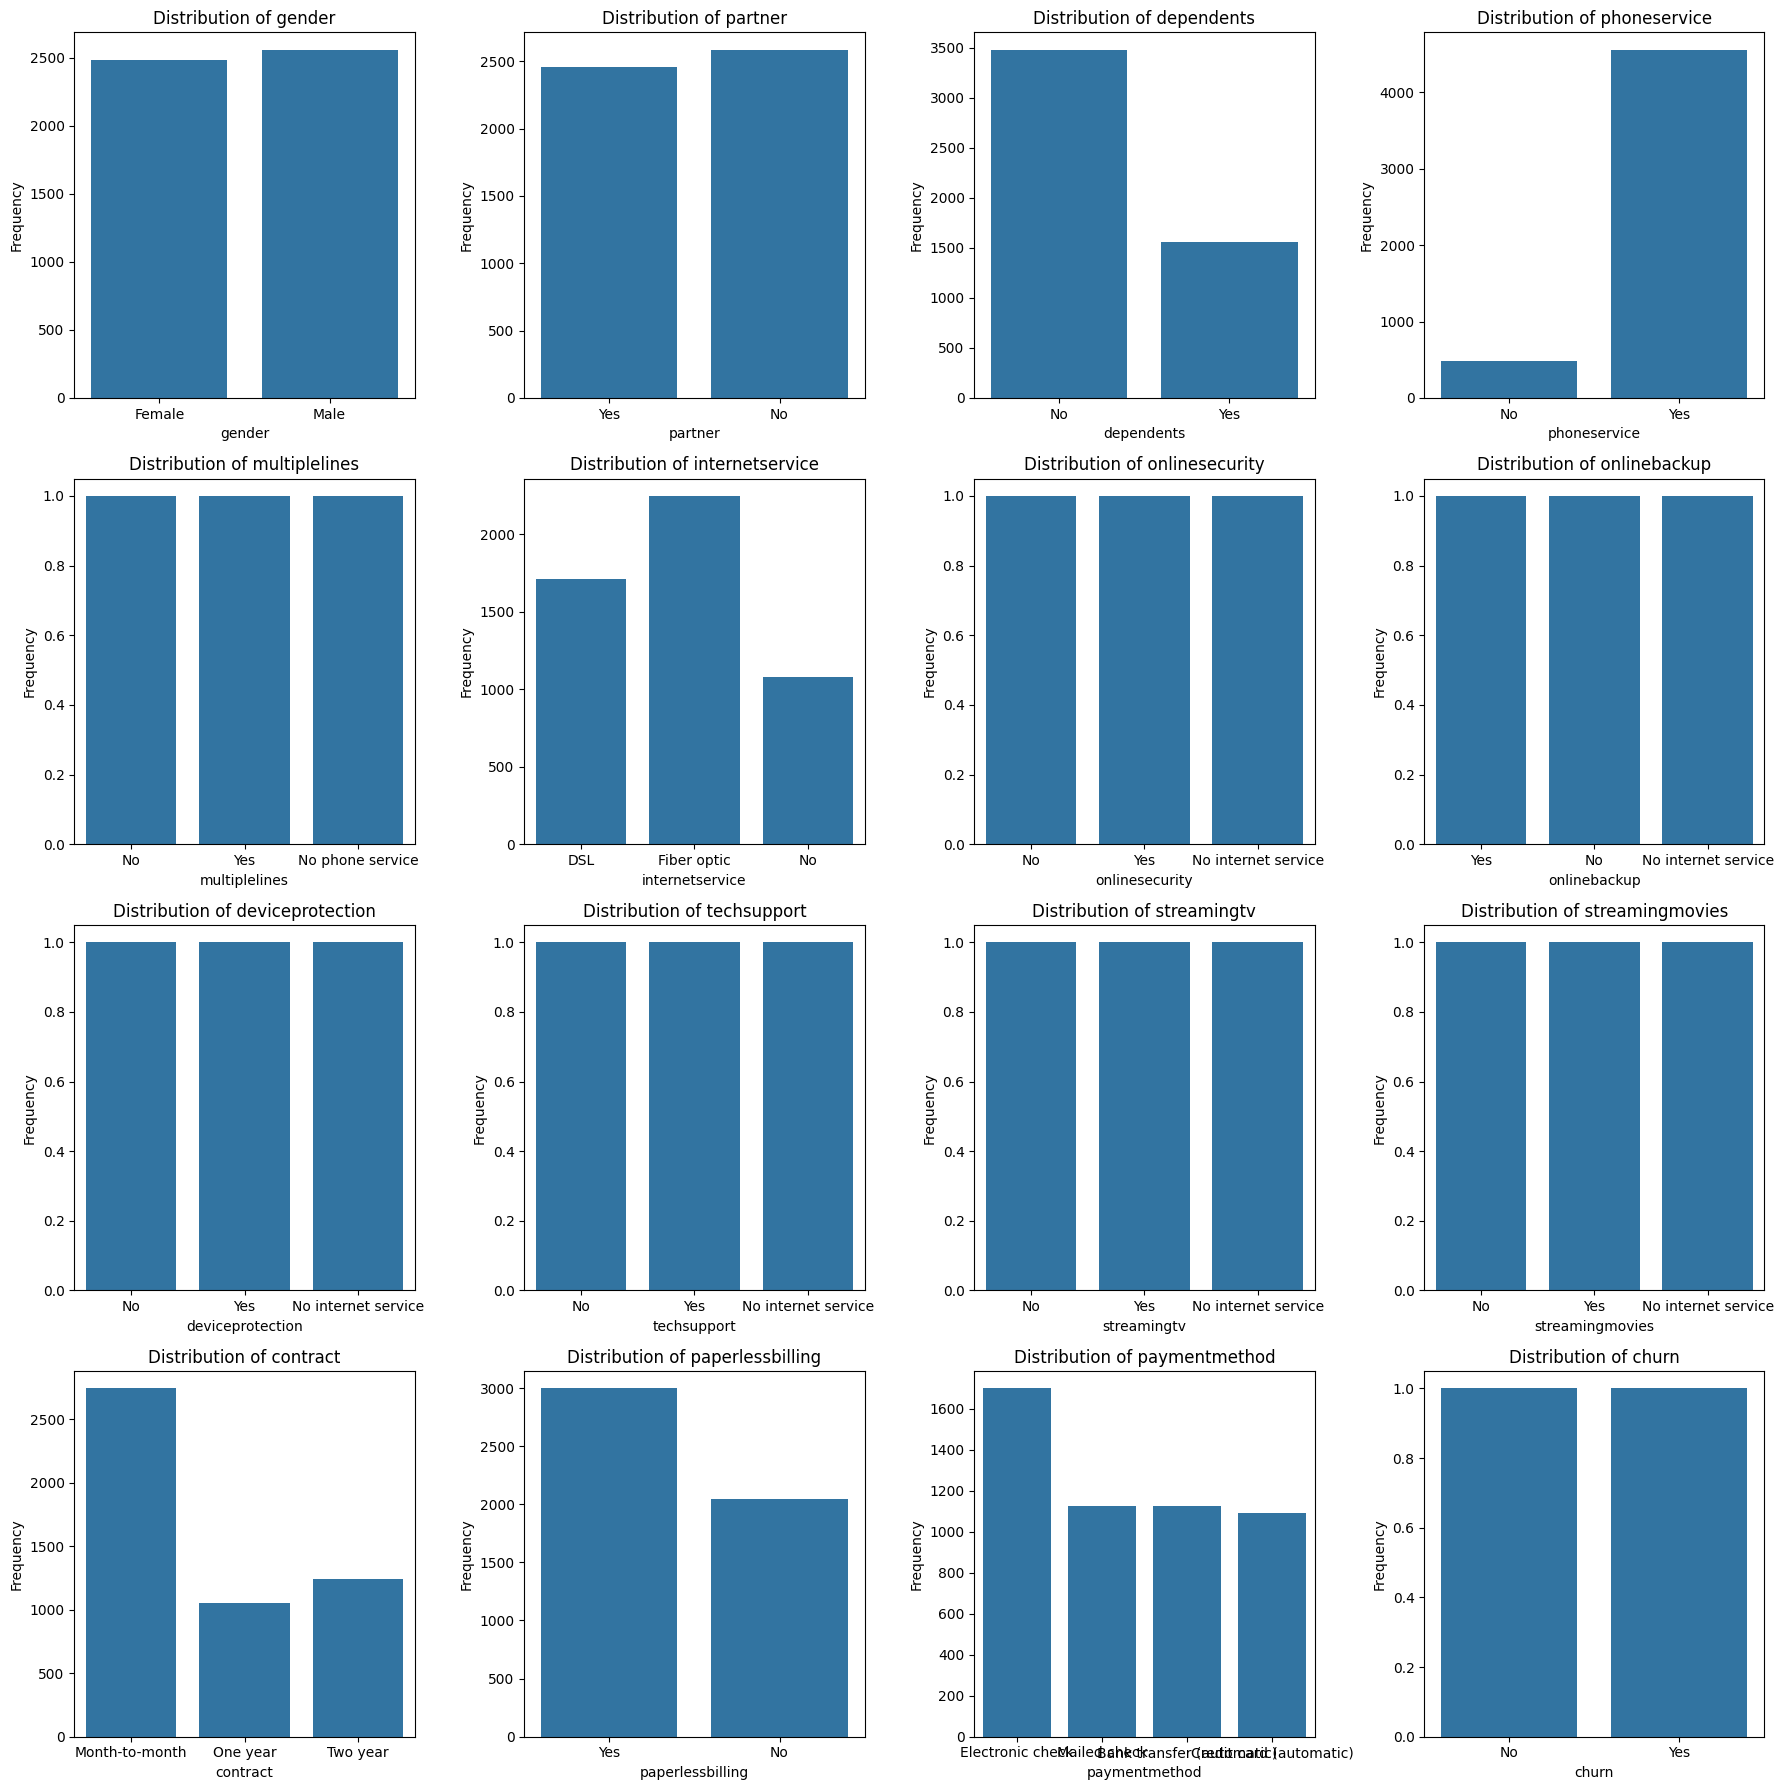

In [29]:

#List of categorical columns
categorical_columns = ['gender', 'partner', 'dependents', 'phoneservice', 'multiplelines', 
                       'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 
                       'techsupport', 'streamingtv', 'streamingmovies', 'contract', 
                       'paperlessbilling', 'paymentmethod', 'churn']

#Set up the figure and axes for plotting
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(18, 18))
axes = axes.flatten()

#Loop through each categorical column and plot the frequency of each category
for i, column in enumerate(categorical_columns):
    #Check for duplicate labels and drop them
    unique_values = df[column].unique()
    if len(unique_values) != df[column].nunique():
        df_unique = df.drop_duplicates(subset=column)
        sns.countplot(x=column, data=df_unique, ax=axes[i])
    else:
        sns.countplot(x=column, data=df, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

#Adjust layout
plt.tight_layout()
plt.show()

##### Distribution of Numerical Variables

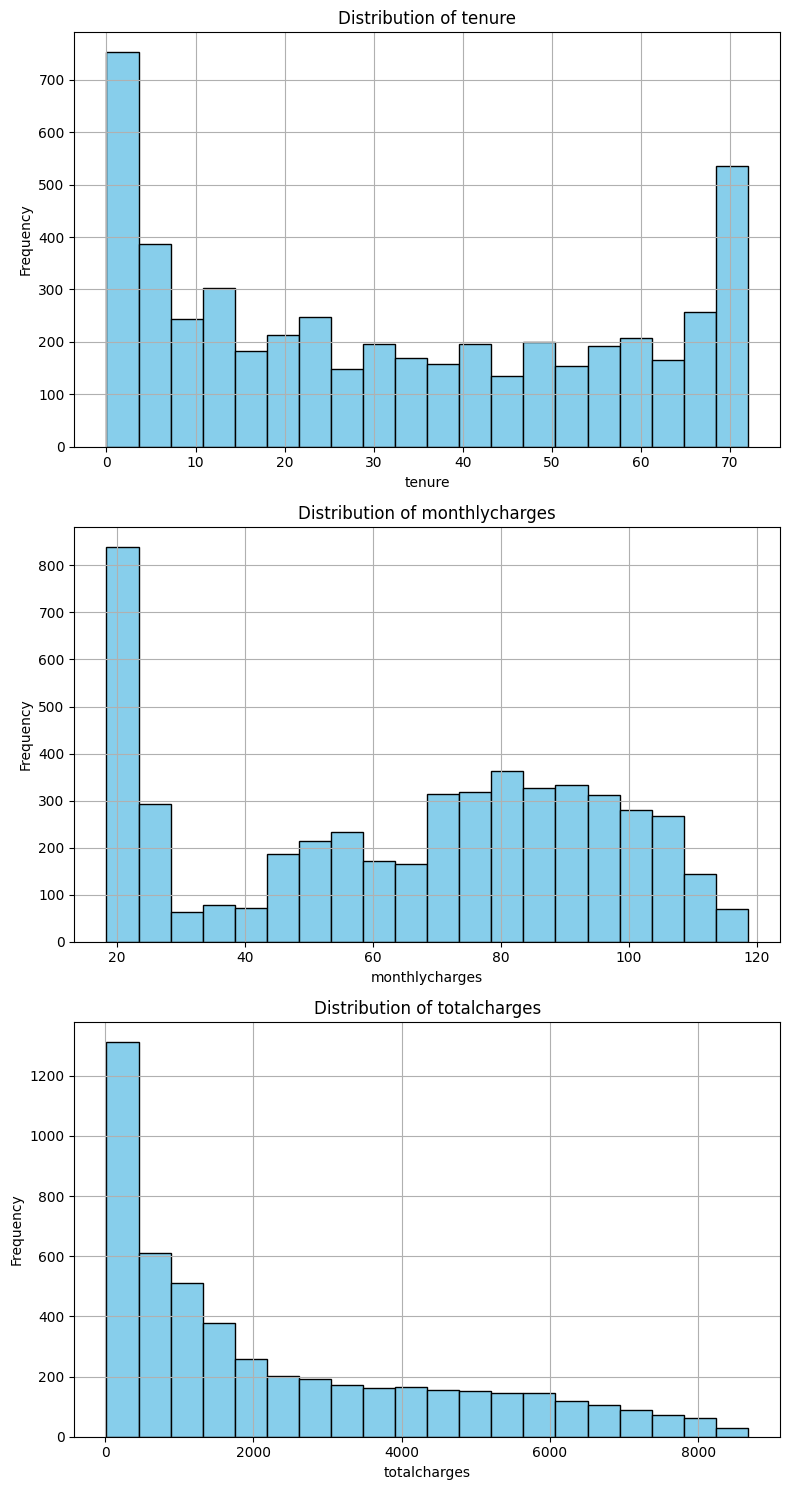

In [30]:
#List of numerical columns
numerical_columns = ['tenure', 'monthlycharges', 'totalcharges']

#Set up the figure and axes for plotting
fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=1, figsize=(8, 5*len(numerical_columns)))

#Loop through each numerical column and plot its histogram
for i, column in enumerate(numerical_columns):
    df[column].hist(ax=axes[i], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

#Adjust layout
plt.tight_layout()
plt.show()

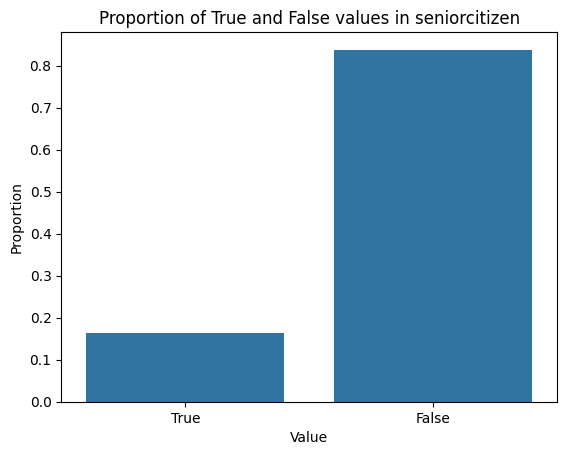

In [31]:
#Boolean variable to analyze
boolean_variable = 'seniorcitizen'

#Calculate the proportion of 'True' and 'False' values
proportion_true = df[boolean_variable].sum() / len(df)
proportion_false = 1 - proportion_true

#Plot the proportions
sns.barplot(x=['True', 'False'], y=[proportion_true, proportion_false])
plt.title(f'Proportion of True and False values in {boolean_variable}')
plt.xlabel('Value')
plt.ylabel('Proportion')
plt.show()

##### Check for Outliers

In [32]:
#Check summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
seniorcitizen,5043.0,0.162403,0.368857,0.000000,0.000000,0.000000,0.000000,1.000000
tenure,5043.0,32.576641,24.529807,0.000000,9.000000,29.000000,56.000000,72.000000
monthlycharges,5043.0,65.090214,30.068133,18.400000,35.775000,70.550003,90.050003,118.650002
totalcharges,5035.0,2302.062861,2269.483576,18.799999,417.675003,1401.150024,3862.000000,8670.100000


##### Observation
1. The 'seniorcitizen', 'tenure' and 'monthlycharges' columns do not have any missing values but the 'totalcharges' column has missing values.
2. The average monthlycharge is approximately 65.09, the minimum monthlycharge is approximately 18.4 and the maximum monthlycharge is approximately 118.65. 
3. In the 'tenure' column, the standard deviation is approximately 24.53, indicating that the values are spread out over a wide range. 

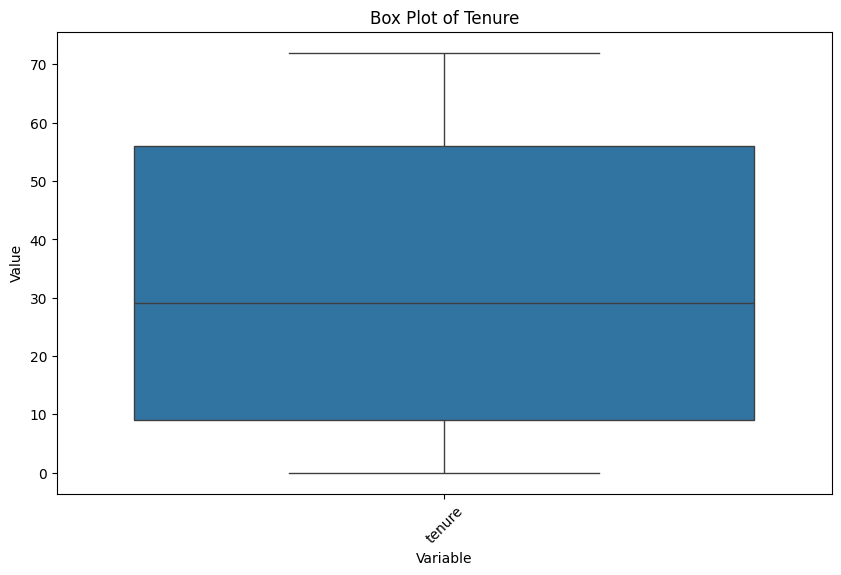

In [33]:
#Check 'tenure' 
numerical_column = ['tenure']
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_column])
plt.title('Box Plot of Tenure')
plt.xlabel('Variable')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

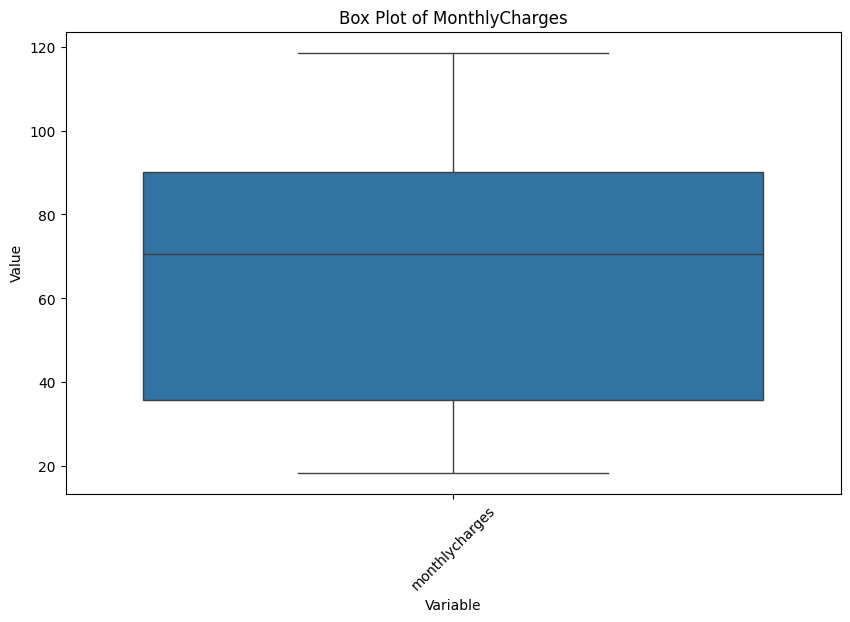

In [34]:
#Check 'monthlycharges' 
numerical_column = ['monthlycharges']
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_column])
plt.title('Box Plot of MonthlyCharges')
plt.xlabel('Variable')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

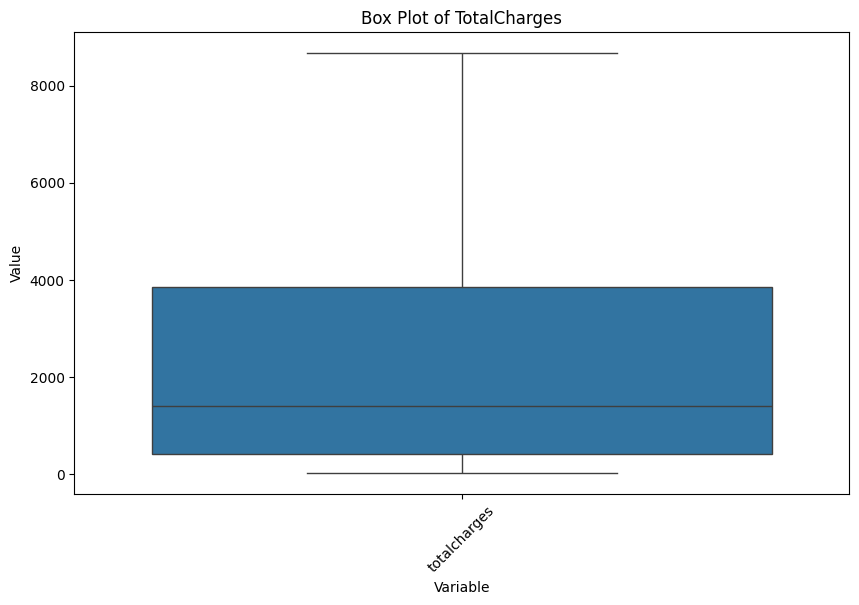

In [35]:
#Check 'totalcharges' 
numerical_column = ['totalcharges']
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_column])
plt.title('Box Plot of TotalCharges')
plt.xlabel('Variable')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

##### Observation
1. This shows all the columns do not have any outliers.
2. The 'tenure' boxplot suggests a fairly even distribution of tenure values across the dataset.
3. The 'monthlycharges' boxplot suggests that most customers have monthly charges clustered around the median, with a fairly consistent spread across the quartiles.
4. The 'totalcharges' values are concentrated between approximately 2000 and 4000, with the median closer to Q3, suggesting a skew towards higher charges.

##### Bivariate Analysis

##### Gender Vrs Churn Rate

In [36]:
#Get the count of churn for each gender
gender_churn_counts = df.groupby(['gender', 'churn']).size().unstack(fill_value=0)

print(gender_churn_counts)

churn     No  Yes
gender           
Female  1823  661
Male    1883  675


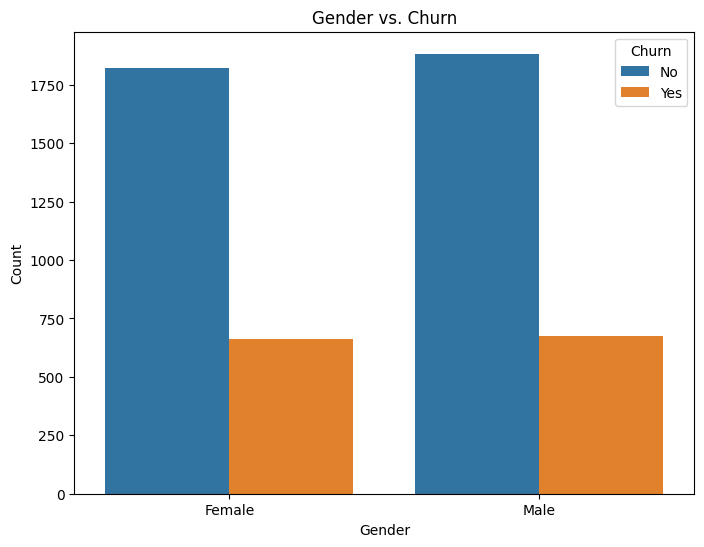

In [37]:
#Plot Gender vs. Churn
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='churn', data=df)
plt.title('Gender vs. Churn')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

##### This implies that among females, 1823 customers did not churn, and 661 customers did churn. Similarly, among males, 1883 customers did not churn, and 675 customers did churn. 

##### Correlation of Numerical Variables

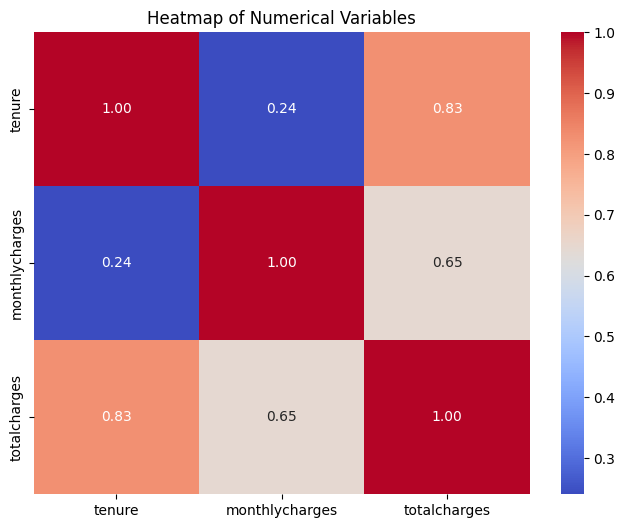

In [38]:
#Select the relevant columns
selected_columns = ['tenure', 'monthlycharges', 'totalcharges']
selected_corr_matrix = df[selected_columns].corr()

#Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(selected_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Numerical Variables')
plt.show()

##### Observations
1. Tenure vs. Monthly Charges: There’s a weak positive correlation of (0.24), suggesting that as tenure increases, monthly charges tend to increase slightly.
2. Tenure vs. Total Charges: A strong positive correlation of (0.83) is observed here, indicating that longer tenure is strongly associated with higher total charges.
3. Monthly Charges vs. Total Charges: This pair shows a moderate positive correlation of (0.65), meaning as monthly charges increase, total charges also tend to increase.

##### Contract Vrs Churn

In [39]:
contract_churn_counts = df.groupby(['contract', 'churn']).size()
print(contract_churn_counts)

contract        churn
Month-to-month  No       1560
                Yes      1184
One year        No        933
                Yes       122
Two year        No       1213
                Yes        30
dtype: int64


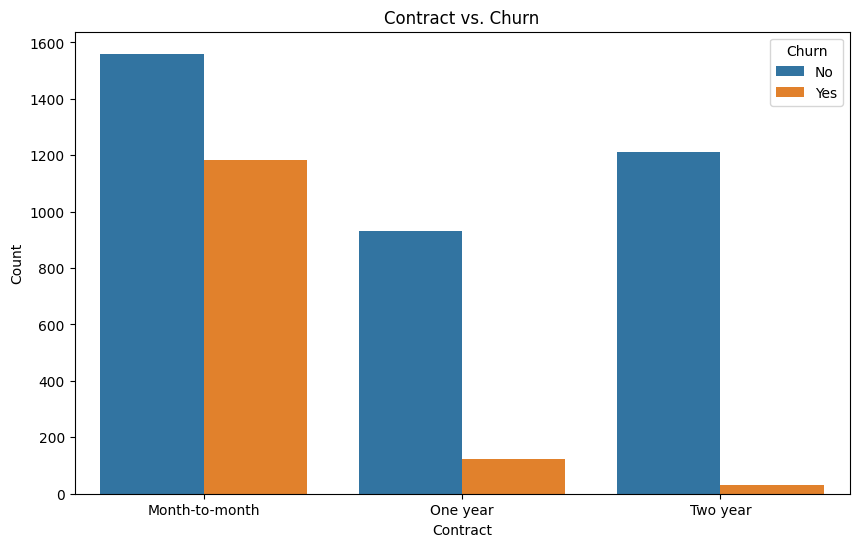

In [40]:
#Create a bar plot
plt.figure(figsize=(10, 6))
sns.countplot(x='contract', hue='churn', data=df)
plt.title('Contract vs. Churn')
plt.xlabel('Contract')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()


##### Observations
1. For customers with a 'Month-to-month' contract, there are 1560 customers who did not churn (No) and 1184 customers who did churn (Yes).
2. For customers with a 'One year' contract, there are 933 customers who did not churn and 122 customers who did churn.
3. For customers with a 'Two year' contract, there are 1213 customers who did not churn and 30 customers who did churn.
4. It can be concluded that customers with shorter-term contracts (like 'Month-to-month') tend to churn more compared to those with longer-term contracts.

##### Multivariate Analysis

##### The 'churn' column contains string values ('Yes' and 'No'), which cannot be converted to float for correlation calculation. To perform correlation analysis, we need to encode these categorical values into numerical values first. One common approach is to use label encoding, where 'Yes' is replaced with 1 and 'No' is replaced with 0.

In [41]:
#Initialize LabelEncoder
label_encoder = LabelEncoder()

#Encode the 'churn' column
df['churn_encoded'] = label_encoder.fit_transform(df['churn'])

#Calculate correlation matrix
correlation_matrix = df[['tenure', 'monthlycharges', 'totalcharges', 'churn_encoded']].corr()

#Display correlation matrix
print(correlation_matrix)

                  tenure  monthlycharges  totalcharges  churn_encoded
tenure          1.000000        0.240645      0.826264      -0.348894
monthlycharges  0.240645        1.000000      0.647007       0.203117
totalcharges    0.826264        0.647007      1.000000      -0.192298
churn_encoded  -0.348894        0.203117     -0.192298       1.000000


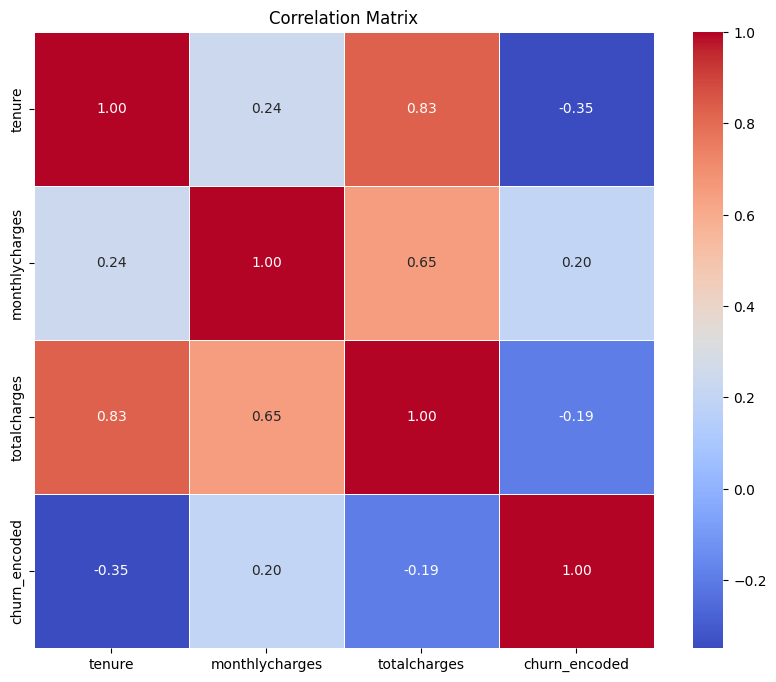

In [42]:
#Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

##### Observations
1. tenure vs. monthlycharges: There is a positive correlation of approximately 0.24, indicating that as tenure increases, monthly charges also tend to increase, but the correlation is not very strong.
2. tenure vs. totalcharges: There is a strong positive correlation of approximately 0.83, suggesting that as tenure increases, total charges also increase.
3. tenure vs. churn_encoded: There is a negative correlation of approximately -0.35, indicating that as tenure increases, the likelihood of churn decreases.

#### HYPOTHESIS TESTING


##### Null Hypothesis: There is no relationship between the tenure and the churn of customers.
Alternate Hypothesis: There is a relationship between the tenure and the churn of customers.

In [43]:
#Create a contingency table
contingency_table = pd.crosstab(df['tenure'], df['churn'])

#Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

#Set significance level
alpha = 0.05

print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)

#Compare p-value with alpha to make a decision
if p < alpha:
    print("Reject the null hypothesis: There is a relationship between tenure and churn.")
else:
    print("Fail to reject the null hypothesis: There is no relationship between tenure and churn.")


Chi-square statistic: 774.1801118993867
P-value: 3.084245822214292e-118
Degrees of freedom: 72
Reject the null hypothesis: There is a relationship between tenure and churn.


##### Based on the p-value (which is far below the significance level of 0.05), we reject the null hypothesis. This means that there is sufficient evidence to conclude that there is a statistically significant relationship between tenure and churn.

#### ANSWERING THE ANALYTICAL QUESTIONS

1. What is the overall churn rate against retained customers?
2. Does churn rate differ based on the payment method?
3. What is the churn rate of customers based on their seniority?
4. What is the churn rate of customers based on their monthlycharges?
5. What is the churn rate of customers based on their contract type?
6. What is the churn rate of customers based on their gender?

##### Question One: What is the overall churn rate against retained customers?

In [44]:
#Count the number of customers who churned
churned_count = df['churn'].value_counts()['Yes']

#Calculate the total number of customers
total_customers = len(df)

#Calculate the overall churn rate
overall_churn_rate = (churned_count / total_customers) * 100

print("Overall churn rate:", overall_churn_rate)

Overall churn rate: 26.492167360697998


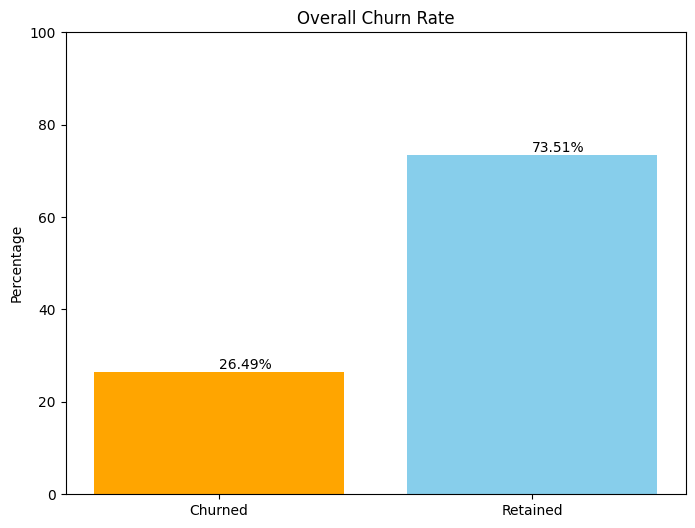

In [45]:
#Calculate the churn rates as percentages
churn_rate_percentage = (churned_count / total_customers) * 100
retention_rate_percentage = 100 - churn_rate_percentage

#Create a bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(["Churned", "Retained"], [churn_rate_percentage, retention_rate_percentage], color=['orange', 'skyblue'])
plt.title("Overall Churn Rate")
plt.ylabel("Percentage")
plt.ylim(0, 100)

#Show the percentages on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f"{yval:.2f}%", va='bottom')

plt.show()

##### This shows a bar plot with two bars: one for the churned customers and one for the retained customers. It shows there are more retained customers than customers that churned. 

##### Question Two: Does churn rate differ based on the payment method?

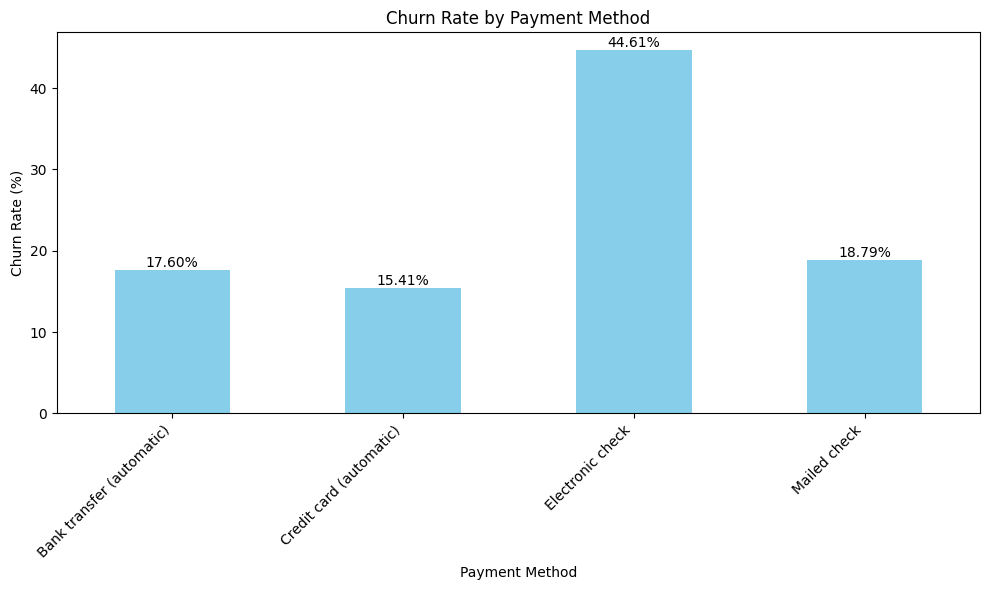

In [46]:
#Calculate churn rate for each payment method
payment_churn_rates = df.groupby('paymentmethod')['churn'].value_counts(normalize=True).loc[:, 'Yes'] * 100

# Plot churn rate based on payment method
plt.figure(figsize=(10, 6))
ax = payment_churn_rates.plot(kind='bar', color='skyblue')
plt.title('Churn Rate by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=45, ha='right')

#Add labels on top of each bar
for i, rate in enumerate(payment_churn_rates):
    plt.text(i, rate, f'{rate:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

##### This shows that customers using electronic check have the highest churn rate, which could suggest issues with this payment method. This might be as a result of user dissatisfaction hence requires further investigation and improvement of the payment process.

##### Question Three: What is the churn rate of customers based on their Seniority?

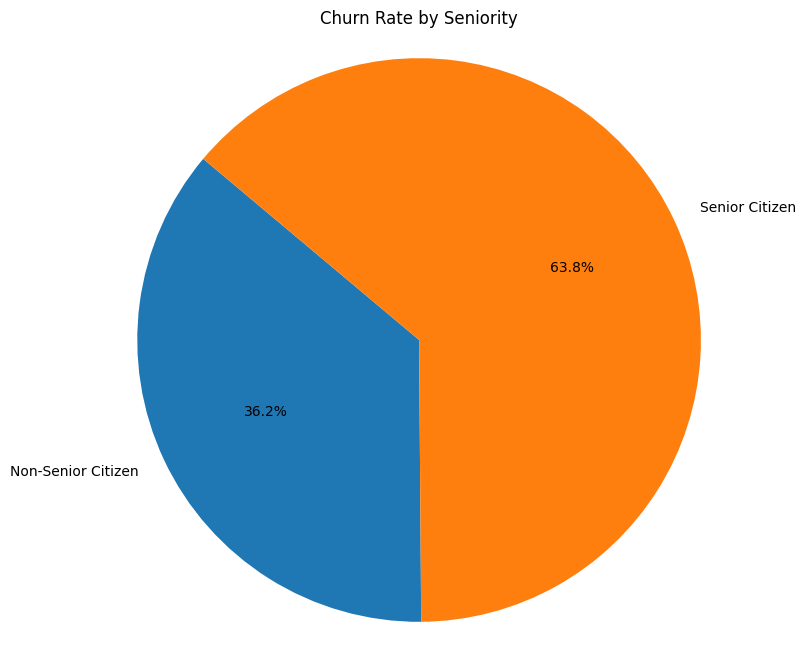

In [47]:
# Calculate churn rate based on seniority
seniority_churn_rate = df.groupby('seniorcitizen')['churn'].value_counts(normalize=True)[:, 'Yes'] * 100

# Plot churn rate based on seniority using a pie chart
plt.figure(figsize=(8, 8))
plt.pie(seniority_churn_rate, labels=['Senior Citizen' if seniority == 1 else 'Non-Senior Citizen' for seniority in seniority_churn_rate.index], autopct='%1.1f%%', startangle=140)
plt.title('Churn Rate by Seniority')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


##### Question Four: What is the churn rate of customers based on their monthlycharges?

In [48]:
#Check unique values in the monthlycharges column
unique_monthlycharges = df['monthlycharges'].unique()

#Print unique values
print(unique_monthlycharges)

[ 29.85000038  56.95000076  53.84999847 ...  78.7         60.65
 103.2       ]


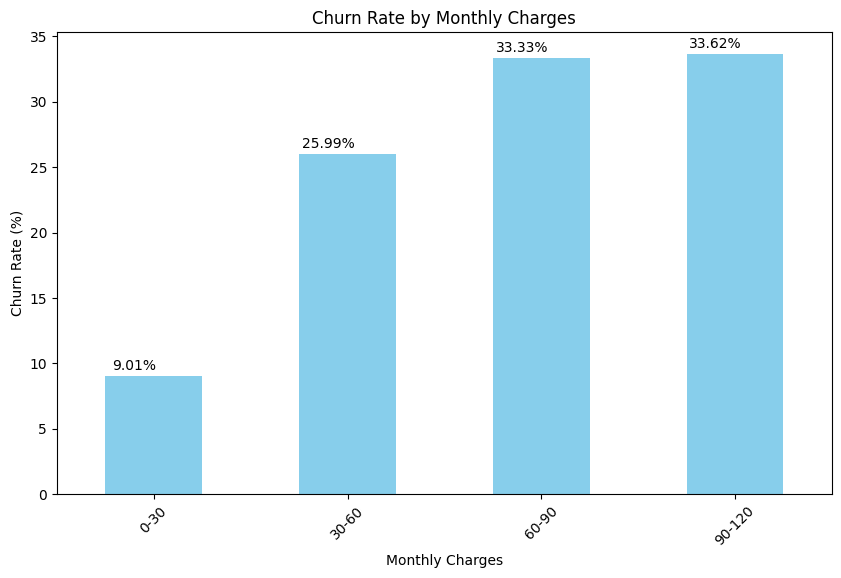

In [49]:
#Define bins for monthly charges
bins = [0, 30, 60, 90, 120]

#Create labels for the bins
labels = ['0-30', '30-60', '60-90', '90-120']

#Assign each monthly charge to a bin
df['monthly_charges_bin'] = pd.cut(df['monthlycharges'], bins=bins, labels=labels, right=False)

#Calculate churn rate based on monthly charges
monthly_charges_churn_rate = df.groupby('monthly_charges_bin')['churn'].value_counts(normalize=True)[:, 'Yes'] * 100

#Plot churn rate based on monthly charges using a bar plot
plt.figure(figsize=(10, 6))
bars = monthly_charges_churn_rate.plot(kind='bar', color='skyblue')
plt.title('Churn Rate by Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=45)

# Add labels on the bars
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.5, f'{bar.get_height():.2f}%', ha='center', color='black')

plt.show()

##### This illustrates the relationship between the amount customers are charged monthly and the rate at which they stop using the service (churn rate). 
0-30 Range: Represents the lowest monthly charges and corresponds to the lowest churn rate, suggesting customers are satisfied with the service or find it affordable.

30-60 Range: Shows a significant increase in churn rate, indicating a threshold where customers may begin to consider the service too expensive or not worth the cost.

60-90 & 90-120 Ranges: Both have the highest and constant churn rates, suggesting that beyond a certain price point, the churn rate stabilizes, possibly due to a segment of customers who are less price-sensitive.

##### Question Five: What is the churn rate of customers based on their contract type?

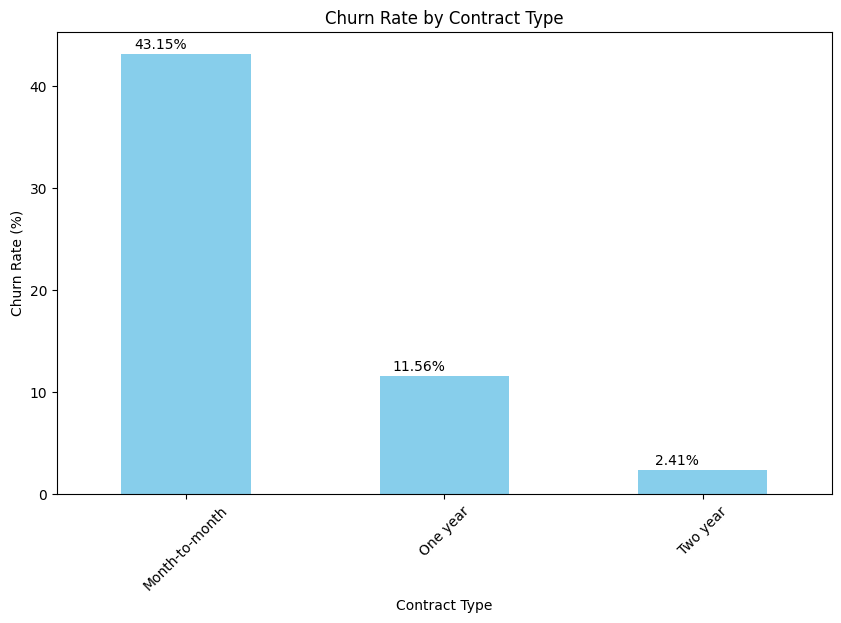

In [50]:
#Calculate churn rate based on contract type
contract_churn_rate = df.groupby('contract')['churn'].value_counts(normalize=True)[:, 'Yes'] * 100

#Plot churn rate based on contract type using a bar plot
plt.figure(figsize=(10, 6))
bars = contract_churn_rate.plot(kind='bar', color='skyblue')
plt.title('Churn Rate by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=45)

#Add labels on the bars
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.5, f'{bar.get_height():.2f}%', ha='center', color='black')

plt.show()


##### This compares the churn rates across different contract durations. 
Month-to-Month: This category has the highest churn rate, around 40%, indicating that customers with no long-term commitments are more likely to discontinue the service.

One Year: Shows a significantly lower churn rate of about 12%, suggesting increased customer retention with longer contract terms.

Two Years: Has the lowest churn rate, which implies that the longest commitment contracts result in the best customer retention.

##### Question Six: What is the churn rate of customers based on their gender?

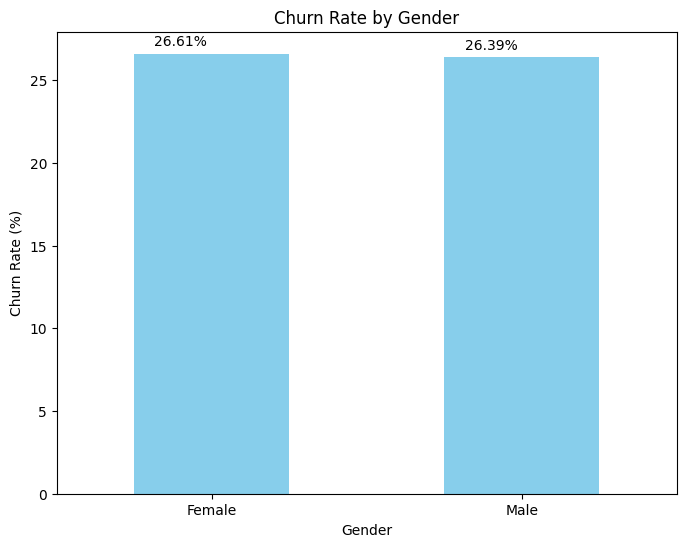

In [51]:
#Calculate churn rate based on gender
gender_churn_rate = df.groupby('gender')['churn'].value_counts(normalize=True)[:, 'Yes'] * 100

#Plot churn rate based on gender using a bar plot
plt.figure(figsize=(8, 6))
bars = gender_churn_rate.plot(kind='bar', color='skyblue')
plt.title('Churn Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=0)

#Add labels on the bars
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.5, f'{bar.get_height():.2f}%', ha='center', color='black')

plt.show()

##### The churn rates are nearly identical for both genders, suggesting that gender does not play a significant role in the likelihood of customers discontinuing the service.

In [52]:
#Converting merged dataset to csv
df.to_csv('merged_dataset.csv', index=False)

#### DATA PREPARATION

##### Check if dataset is balanced

In [53]:
#Check dataframe
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,churn_encoded,monthly_charges_bin
0,7590-VHVEG,Female,0,Yes,No,1,No,None,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No,0,0-30
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.950001,1889.500000,No,0,30-60
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes,1,30-60
3,7795-CFOCW,Male,0,No,No,45,No,None,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No,0,30-60
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes,1,60-90


In [54]:
#Drop the 'customerid', 'churn_encoded' and 'monthly_charges_bin' columns
df = df.drop(['customerid', 'churn_encoded', 'monthly_charges_bin'], axis=1)

In [78]:
#Check dataframe
df.head(20)

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,Female,0,Yes,No,1,No,None,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,Male,0,No,No,45,No,None,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.650002,820.500000,Yes
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.099998,1949.400024,No
7,Female,0,No,No,10,No,None,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.750000,301.899994,No
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.800003,3046.050049,Yes
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.150002,3487.949951,No


In [56]:
#Check for missing values in the churn column
missing_values = df['churn'].isnull().sum()

if missing_values == 0:
    print("There are no missing values in the churn column.")
else:
    print(f"There is {missing_values} missing value in the churn column.")

There is 1 missing value in the churn column.


In [57]:
#Drop rows with missing values in the churn column
df.dropna(subset=['churn'], inplace=True)

In [58]:
#Check to confirm the missing values in the churn column
missing_values = df['churn'].isnull().sum()

if missing_values == 0:
    print("There are no missing values in the churn column.")
else:
    print(f"There are {missing_values} missing values in the churn column.")

There are no missing values in the churn column.


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5042 entries, 0 to 2042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5042 non-null   object 
 1   seniorcitizen     5042 non-null   int64  
 2   partner           5042 non-null   object 
 3   dependents        5042 non-null   object 
 4   tenure            5042 non-null   int64  
 5   phoneservice      5042 non-null   object 
 6   multiplelines     4773 non-null   object 
 7   internetservice   5042 non-null   object 
 8   onlinesecurity    4391 non-null   object 
 9   onlinebackup      4391 non-null   object 
 10  deviceprotection  4391 non-null   object 
 11  techsupport       4391 non-null   object 
 12  streamingtv       4391 non-null   object 
 13  streamingmovies   4391 non-null   object 
 14  contract          5042 non-null   object 
 15  paperlessbilling  5042 non-null   object 
 16  paymentmethod     5042 non-null   object 
 17  

In [60]:
#Change the data type of the seniorcitizen column to object
df['seniorcitizen'] = df['seniorcitizen'].astype(str)

##### To check if the dataset is balanced, we set a threshold of 5%. If the absolute difference between the counts of the two classes is less than the threshold, then the dataset is considered balanced; otherwise, it's considered imbalanced.

In [61]:
#The target variable is 'churn' and it binary are (Yes/No)
#Count the occurrences of each class
class_counts = df['churn'].value_counts()

#Set the threshold for imbalance(5% of the total number of rows)
threshold = len(df) * 0.05 

#Check if the dataset is balanced
is_balanced = abs(class_counts[0] - class_counts[1]) < threshold  

if is_balanced:
    print("The dataset is balanced.")
else:
    print("The dataset is imbalanced.")

The dataset is imbalanced.


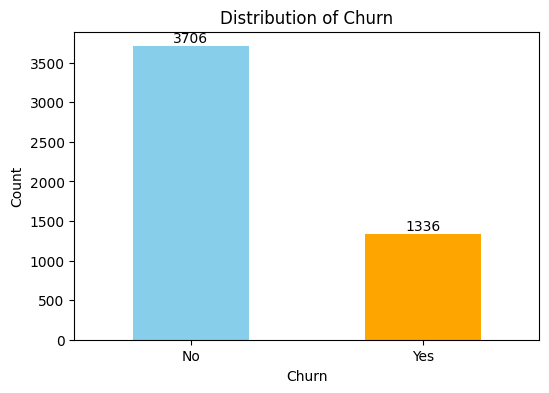

In [62]:
#Count the occurrences of each class
class_counts = df['churn'].value_counts()

#Plot the distribution of the target variable
plt.figure(figsize=(6, 4))
bars = class_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks(rotation=0)

#Annotate the bars with churn counts
for i, count in enumerate(class_counts):
    plt.text(i, count + 10, str(count), ha='center', va='bottom')

plt.show()

###### The visual also confirms the dataset is not balanced since it has more 'No' values than 'Yes' values.

##### TRAINING THE IMBALANCED DATASET

##### Split the Dataset into Training and Evaluation Set

##### In splitting the data, it is done such that;
X contains all the features except the target variable (churn).

y contains only the target variable (churn).

We use train_test_split to split the data into training and evaluation sets and set test_size to 0.3 which specifies that 30% of the data should be used for evaluation, while the rest is used for training. 

X_train and y_train contain the training features and target variable respectively.X_eval and y_eval contain the evaluation features and target variable respectively.


In [63]:
#Define features (X) and target variable (y)
X = df.drop('churn', axis=1) 
y = df['churn']  

#Split the dataset into training and evaluation sets
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

##### Encode the y train and evaluation labels

In [64]:
#Initialize LabelEncoder
label_encoder = LabelEncoder()

#Encode the target variable 'churn' for training set
y_train_encoded = label_encoder.fit_transform(y_train)

#Encode the target variable 'churn' for evaluation set
y_eval_encoded = label_encoder.transform(y_eval)

##### Prepare Pipelines

In [65]:
#Identify the categorical columns
X.select_dtypes('object').columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice',
       'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup',
       'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies',
       'contract', 'paperlessbilling', 'paymentmethod'],
      dtype='object')

In [66]:
#Identify the numerical columns
X.select_dtypes('number').columns

Index(['tenure', 'monthlycharges', 'totalcharges'], dtype='object')

In [67]:
#Define numerical and categorical features
numerical_features = ['tenure', 'monthlycharges', 'totalcharges']
categorical_features = ['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice',
                        'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup',
                        'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies',
                        'contract', 'paperlessbilling', 'paymentmethod']

#Create preprocessing steps for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='median')),  #Fill missing values with the median
    ('scaler', StandardScaler())  #Scale the numerical features
])

categorical_transformer = Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  #One-hot encode categorical features
])

#Combine preprocessing steps for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[ 
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

#### MODELLING AND EVALUATION

In [ ]:
#Define the models
models = [
    ('K-Nearest_Neighbors', KNeighborsClassifier(n_neighbors=5)),  
    ('Logistic_Regression', LogisticRegression(random_state=42)),  
    ('Support_Vector_Machine', SVC(random_state=42)),  
    ('Decision_Tree', DecisionTreeClassifier(random_state=42)),  
    ('Random_Forest', RandomForestClassifier(random_state=42)),  
    ('Gradient_Boosting', GradientBoostingClassifier(random_state=42)),  
]

#Creating dictionary for the models
all_pipelines = {}

#Create a DataFrame for the metrics
metrics_output = pd.DataFrame(columns=['model_name', 'accuracy', 'precision', 'recall', 'f1_score'])

#Train and evaluate each model
for model_name, classifier in models:
    #Create a pipeline for the model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', classifier)])  
    
    #Train the model
    pipeline.fit(X_train, y_train_encoded)

    #Add all pipeline to the all_pipeline dictionary
    all_pipelines[model_name] = pipeline
    
    #Make predictions on the test set
    y_pred = pipeline.predict(X_eval)

    #Generate classification report for each model
    metrics = classification_report(y_eval_encoded, y_pred, output_dict=True)
    
    #Evaluate the model
    accuracy = metrics['accuracy']
    precision = metrics['weighted avg']['precision']
    recall = metrics['weighted avg']['recall']
    f1_score= metrics['weighted avg']['f1-score']

    #Add metrics to metrics_output
    metrics_output.loc[len(metrics_output)] = [model_name, accuracy, precision, recall, f1_score]

In [69]:
#Display the metrics_output
metrics_output.sort_values(ascending=False, by='f1_score')

,model_name,accuracy,precision,recall,f1_score
2,Support_Vector_Machine,0.791143,0.780884,0.791143,0.783662
5,Gradient_Boosting,0.788500,0.780544,0.788500,0.783372
1,Logistic_Regression,0.781229,0.775566,0.781229,0.777933
4,Random_Forest,0.783212,0.773208,0.783212,0.776386
0,K-Nearest_Neighbors,0.768672,0.766503,0.768672,0.767535
3,Decision_Tree,0.721745,0.731100,0.721745,0.725898


* Support Vector Machine (SVM): It has the highest F1 score among all models, indicating a good balance between precision and recall. This means it's effective at both correctly identifying positive cases (precision) and capturing most of the positive cases in the dataset (recall).

* Gradient Boosting: It also has a high F1 score, very close to SVM, indicating a similar balance between precision and recall. This suggests it's also effective at correctly classifying positive cases while capturing most of them.

* Logistic Regression and Random Forest: They have slightly lower F1 scores compared to SVM and Gradient Boosting, but they still maintain a reasonable balance between precision and recall. They might not be as good as SVM and Gradient Boosting in capturing all positive cases, but they provide decent overall performance.

* K-Nearest Neighbors (KNN): It has a lower F1 score compared to other models, indicating a weaker balance between precision and recall. This suggests it may struggle more with correctly identifying positive cases or capturing all of them.

* Decision Tree: It has the lowest F1 score among all models, indicating the weakest balance between precision and recall. This suggests it might have trouble both correctly classifying positive cases and capturing all of them.

In summary, based on F1 score, SVM and Gradient Boosting are the top-performing models, followed by Logistic Regression and Random Forest, while KNN and Decision Tree lag behind in performance.

##### TRAINING THE BALANCED DATASET 

In [93]:
# Creating dictionary for the models
all_balanced_pipelines = {}

# Create a DataFrame for the metrics
balanced_metrics_output = pd.DataFrame(columns=['model_name', 'accuracy', 'precision', 'recall', 'f1_score'])

# Train and evaluate each model
for model_name, classifier in models:
    # Create a pipeline for the model
    balanced_pipeline = imbPipeline(steps=[('preprocessor', preprocessor),
                                           ('smote-sampler', SMOTE(random_state=42)), 
                                           ('classifier', classifier)])  
    
    # Train the model
    balanced_pipeline.fit(X_train, y_train_encoded)
    
    # Add all pipeline to the all_pipeline dictionary
    all_balanced_pipelines[model_name] = balanced_pipeline
    
    # Make predictions on the test set
    y_pred = balanced_pipeline.predict(X_eval)

    # Generate classification report for each model
    balanced_metrics = classification_report(y_eval_encoded, y_pred, output_dict=True)
    
    # Evaluate the model
    accuracy = balanced_metrics['accuracy']
    precision = balanced_metrics['weighted avg']['precision']
    recall = balanced_metrics['weighted avg']['recall']
    f1_score = balanced_metrics['weighted avg']['f1-score']

    # Add metrics to metrics_output
    balanced_metrics_output.loc[len(balanced_metrics_output)] = [model_name, accuracy, precision, recall, f1_score]


In [94]:
#Display the metrics_output
balanced_metrics_output.sort_values(ascending=False, by='f1_score')

,model_name,accuracy,precision,recall,f1_score
5,Gradient_Boosting,0.766689,0.779152,0.766689,0.771644
4,Random_Forest,0.770654,0.767638,0.770654,0.769041
2,Support_Vector_Machine,0.758096,0.791162,0.758096,0.768041
1,Logistic_Regression,0.737607,0.797736,0.737607,0.751636
3,Decision_Tree,0.711831,0.729559,0.711831,0.719043
0,K-Nearest_Neighbors,0.682750,0.760931,0.682750,0.700819


##### This is the reults of the performance of the models after balancing the dataset.
* Random Forest achieved the highest accuracy and F1 score among the models, indicating that it performed well overall in terms of correctly classifying instances and achieving a balance between precision and recall. It also had relatively high precision and recall.

* Gradient Boosting had slightly lower accuracy and F1 score compared to Random Forest but still performed well overall. It had similar precision and recall to Random Forest.

* Support Vector Machine (SVM) had the highest precision among the models, suggesting that it had the fewest false positive predictions. However, its accuracy and F1 score were slightly lower than those of Random Forest and Gradient Boosting.

* Logistic Regression had moderate performance, with accuracy, precision, recall, and F1 score falling in the mid-range among the models.

* Decision Tree showed lower performance compared to Random Forest and Gradient Boosting, with lower accuracy, precision, recall, and F1 score.

* K-Nearest Neighbors (KNN) had the lowest performance overall, with the lowest accuracy, precision, recall, and F1 score among the models.

##### Applying feature selection to improve performance of the models

In [95]:
# Creating dictionary for the models
all_bf_pipelines = {}

# Create a DataFrame for the metrics
bf_metrics_output = pd.DataFrame(columns=['model_name', 'accuracy', 'precision', 'recall', 'f1_score'])

# Train and evaluate each model
for model_name, classifier in models:
    # Create a pipeline for the model
    bf_pipeline = imbPipeline(steps=[('preprocessor', preprocessor),
                                           ('smote-sampler', SMOTE(random_state=42)), 
                                           ('feature_selection', SelectKBest(mutual_info_classif, k='all')),
                                           ('classifier', classifier)])
    
    # Train the model
    bf_pipeline.fit(X_train, y_train_encoded)
    
    # Add all pipeline to the all_pipeline dictionary
    all_bf_pipelines[model_name] = bf_pipeline
    
    # Make predictions on the test set
    y_pred = bf_pipeline.predict(X_eval)

    # Generate classification report for each model
    bf_metrics = classification_report(y_eval_encoded, y_pred, output_dict=True)
    
    # Evaluate the model
    accuracy = bf_metrics['accuracy']
    precision = bf_metrics['weighted avg']['precision']
    recall = bf_metrics['weighted avg']['recall']
    f1_score = bf_metrics['weighted avg']['f1-score']

    # Add metrics to metrics_output
    bf_metrics_output.loc[len(bf_metrics_output)] = [model_name, accuracy, precision, recall, f1_score]

In [96]:
#Display the metrics_output
bf_metrics_output.sort_values(ascending=False, by='f1_score')

,model_name,accuracy,precision,recall,f1_score
5,Gradient_Boosting,0.766689,0.779152,0.766689,0.771644
4,Random_Forest,0.770654,0.767638,0.770654,0.769041
2,Support_Vector_Machine,0.758096,0.791162,0.758096,0.768041
1,Logistic_Regression,0.737607,0.797736,0.737607,0.751636
3,Decision_Tree,0.711831,0.729559,0.711831,0.719043
0,K-Nearest_Neighbors,0.682750,0.760931,0.682750,0.700819


##### The performance of the models are still not the best so we will consider more methods that can improve the performance.